In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

In [84]:
meta_info = pd.read_csv('/home/yuliya/repos/cosybio/removeBatch/test_data/processed_counts/meta_info.tsv', sep='\t')

In [85]:
raw_counts = pd.read_csv('/home/yuliya/repos/cosybio/removeBatch/test_data/processed_counts/data_matrix.tsv', sep='\t')
raw_exprs_normalized = pd.read_csv('/home/yuliya/repos/cosybio/removeBatch/test_data/processed_counts/raw_exprs_normalized.tsv', sep='\t')

batch_corrected_raw = pd.read_csv('/home/yuliya/repos/cosybio/removeBatch/test_data/processed_counts/batch_corrected_raw.tsv', sep='\t')
batch_corrected_normalized = pd.read_csv('/home/yuliya/repos/cosybio/removeBatch/test_data/processed_counts/batch_corrected_normalized.tsv', sep='\t')


# raw plots

In [86]:
# Create color and shape mappings
color_map = {'GSE149276': 'green', 'GSE129508': 'red', 'GSE58135': 'blue'}
shape_map = {1: '^', 0: 'o'} 

# Applying the mappings
colors = meta_info['lab'].map(color_map)
shapes = meta_info['Lum'].map(shape_map)


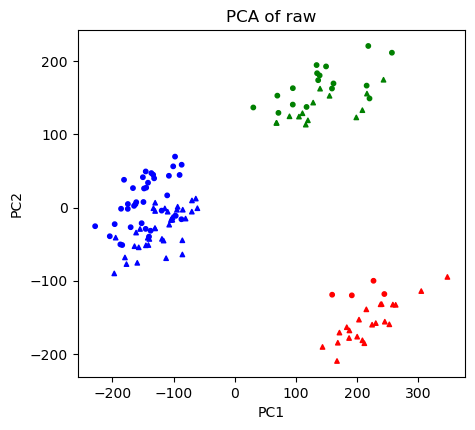

In [87]:
# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.log2(raw_counts + 1).T)

# Plotting
plt.figure(figsize=(5,4.5))
for kind in set(shapes):
    mask = shapes == kind
    plt.scatter(principalComponents[mask, 0], principalComponents[mask, 1], 
                label=kind, c=colors[mask], marker=kind, s=10)
# Set the labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of raw')

# Display the plot
plt.show()

/home/yuliya/anaconda3/envs/deqms_fed/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


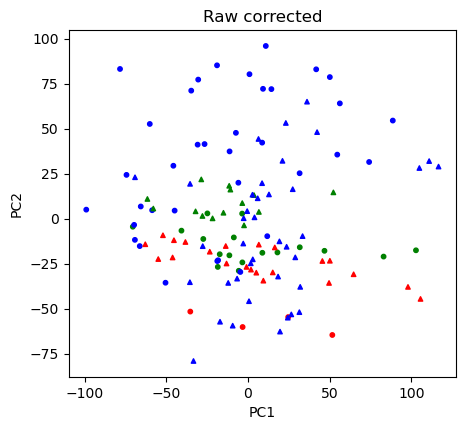

In [88]:
# Performing PCA

# omit rows with NA, like na.omit function from R
batch_corrected_raw = np.log2(batch_corrected_raw + 1).dropna(axis=0, how='any')


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(batch_corrected_raw.T)

# Plotting
plt.figure(figsize=(5,4.5))
for kind in set(shapes):
    mask = shapes == kind
    plt.scatter(principalComponents[mask, 0], principalComponents[mask, 1], 
                label=kind, c=colors[mask], marker=kind, s=10)
# Set the labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Raw corrected')

# Display the plot
plt.show()

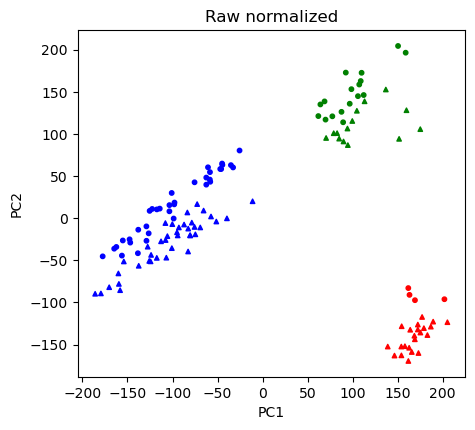

In [89]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(raw_exprs_normalized.T)

# Plotting
plt.figure(figsize=(5,4.5))
for kind in set(shapes):
    mask = shapes == kind
    plt.scatter(principalComponents[mask, 0], principalComponents[mask, 1], 
                label=kind, c=colors[mask], marker=kind, s=10)
# Set the labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Raw normalized')

# Display the plot
plt.show()

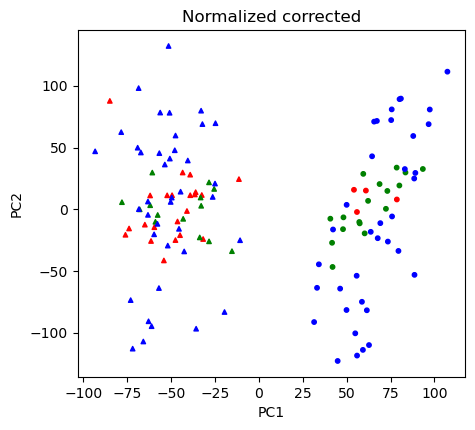

In [90]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(batch_corrected_normalized.T)

# Plotting
plt.figure(figsize=(5,4.5))
for kind in set(shapes):
    mask = shapes == kind
    plt.scatter(principalComponents[mask, 0], principalComponents[mask, 1], 
                label=kind, c=colors[mask], marker=kind, s=10)
# Set the labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Normalized corrected')

# Display the plot
plt.show()